 # 数据集 


In [67]:
##相应的包
import wfdb
import numpy as np
import pywt
import pickle as pk
from collections import Counter
import pandas as pd
import matplotlib.pyplot as plt


In [3]:
#定义变量
# PATH = "../improving-the-quality-of-ecgs-collected-using-mobile-phones-the-physionet-computing-in-cardiology-challenge-2011-1.0.0/set-a/" 
# BTU QDB
PATH = "../dataset/brno-university-of-technology-ecg-quality-database-but-qdb-1.0.0/"
records_file = []

    

data_names = ['100001_ECG']
# labels = ['N', 'S', 'V', 'F', 'Q']
# sub_labels = ['N', 'L', 'R', 'e', 'j', 'A', 'a', 'J', 'S', 'V', 'E', 'F', '/', 'f', 'Q']
# sub = {'N':'N', 'L':'N', 'R':'N', 'e':'N', 'j':'N', 
#            'A':'S', 'a':'S', 'J':'S', 'S':'S',
#            'V':'V', 'E':'V',
#            'F':'F',
#            '/':'Q', 'f':'Q', 'Q':'Q'}
# if_denoise = 'denoise'
# if_normal = 'normal'
# r_seed = 10

In [4]:
with open(PATH+"RECORDS",'r') as records:
    for line in records.readlines():
        line = line.strip('\n')  #去掉列表中每一个元素的换行符
        records_file.append(line)
        

In [61]:
ann = []
for r in records_file:
    folder = r.split("/")[0]
    ann.append(folder+"/"+folder+"_ANN.csv")

In [63]:
ann = list(set(ann))

In [81]:
df.loc[df.a==1].t.sum()/1000/singleTime,3)

0.849

In [82]:
q1_total = []
q2_total = []
q3_total = []
total = []
for annFile in ann:
    #读取每个样本的标注文件     
    df = pd.read_csv(PATH+annFile,names=["s","e","a"],usecols=[9,10,11]).dropna(axis=0,how="any").astype(pd.Int64Dtype()) 
    # 信号的点数
    df['t'] = df['e']-df.s
    singleTime = (df.loc[df.a==1].t.sum()+df.loc[df.a==2].t.sum()+df.loc[df.a==3].t.sum())/1000
    total.append(singleTime)
    q1_total.append(round(df.loc[df.a==1].t.sum()/1000/singleTime,3))
    q2_total.append(round(df.loc[df.a==2].t.sum()/1000/singleTime,3))
    q3_total.append(round(df.loc[df.a==3].t.sum()/1000/singleTime,3))
    
    print(annFile+"样本情况：",end="   ")
#     print("1类信号时长:" + str(q1_total),end="   ")
#     print("2类信号时长："+str(q2_total),end="   ")
    print("总标注信号时长："+str(singleTime))

100001/100001_ANN.csv样本情况：   总标注信号时长：87086.237
113001/113001_ANN.csv样本情况：   总标注信号时长：3599.787
103002/103002_ANN.csv样本情况：   总标注信号时长：2399.89
125001/125001_ANN.csv样本情况：   总标注信号时长：2399.963
126001/126001_ANN.csv样本情况：   总标注信号时长：2399.942
103001/103001_ANN.csv样本情况：   总标注信号时长：2399.817
114001/114001_ANN.csv样本情况：   总标注信号时长：3719.979
104001/104001_ANN.csv样本情况：   总标注信号时长：2399.896
122001/122001_ANN.csv样本情况：   总标注信号时长：2399.975
100002/100002_ANN.csv样本情况：   总标注信号时长：2399.771
105001/105001_ANN.csv样本情况：   总标注信号时长：139145.646
121001/121001_ANN.csv样本情况：   总标注信号时长：2399.83
124001/124001_ANN.csv样本情况：   总标注信号时长：4799.458
115001/115001_ANN.csv样本情况：   总标注信号时长：2399.853
111001/111001_ANN.csv样本情况：   总标注信号时长：90642.261
118001/118001_ANN.csv样本情况：   总标注信号时长：2399.878
123001/123001_ANN.csv样本情况：   总标注信号时长：2399.888
103003/103003_ANN.csv样本情况：   总标注信号时长：2399.826


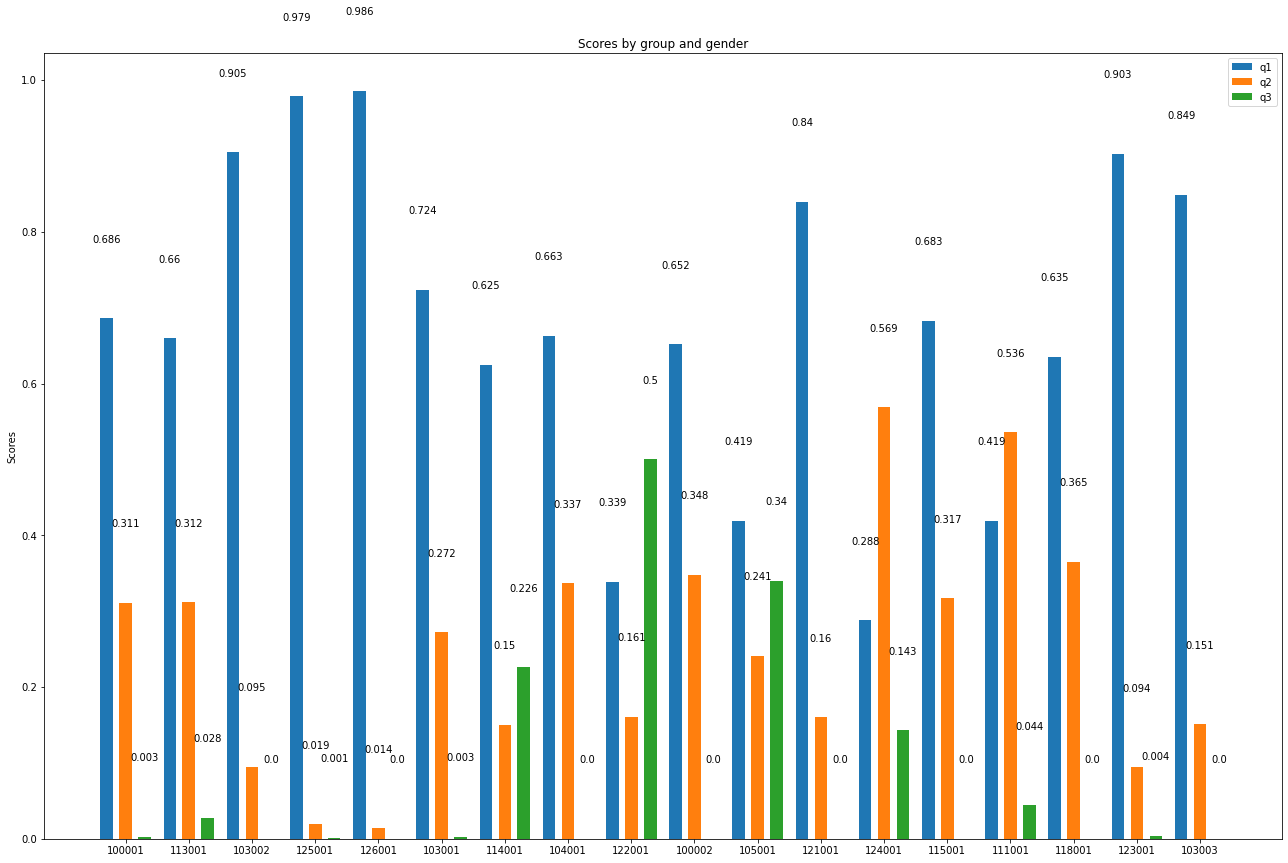

In [88]:
labels = [name.split("/")[0] for name in ann ] # 级别
#  = np.random.randint(20,35,size = 6)
# women_means = np.random.randint(20,35,size = 6)

x = np.arange(len(labels))

plt.figure(figsize=(18,12))
width = 0.2
rects1 = plt.bar(x - 1.5*width, q1_total, width) # 返回绘图区域对象
rects2 = plt.bar(x , q2_total, width)
rects3 = plt.bar(x + 1.5*width, q3_total, width)

# 设置标签标题，图例
plt.ylabel('Scores')
plt.title('Scores by group and gender')
plt.xticks(x,labels)
plt.legend(['q1','q2','q3'])

# 添加注释
def set_label(rects):
    for rect in rects:
        height = rect.get_height() # 获取⾼度
        plt.text(x = rect.get_x() + rect.get_width()/2, # ⽔平坐标
                 y = height + 0.1, # 竖直坐标
                 s = height, # ⽂本
                 ha = 'center') # ⽔平居中

set_label(rects1)
set_label(rects2)
set_label(rects3)

plt.tight_layout() # 设置紧凑布局
# plt.savefig('./分组带标签柱状图.png')


In [31]:
df.info

<bound method DataFrame.info of             s         e  a
0           1      7047  2
1        7048     17209  1
2       17210     28694  2
3       28695     32653  1
4       32654    112474  2
..        ...       ... ..
758  86486096  86580752  2
759  86580753  86588415  1
760  86588416  86757975  2
761  86757976  86827127  1
762  86827128  87087000  2

[763 rows x 3 columns]>

In [46]:
# 取出指定条件的行
df.loc[df['a']==3]

,s,e,a
621,68061376,68171863,3
685,74317624,74427679,3


In [50]:
# 信号的点数
df['t'] = df['e']-df.s

In [56]:
# 计算每种质量信号的比例
q1_total = df.loc[df.a==1].t.sum()
q2_total = df.loc[df.a==2].t.sum()
q3_total = df.loc[df.a==3].t.sum()
print("1的总时长:" + str(q1_total))
print("2的总时长："+str(q2_total))
print("3的总时长："+str(q3_total))

1的总时长:59775638
2的总时长：27090057
3的总时长：220542


In [8]:
r=wfdb.rdrecord(PATH+data_names[0])

In [11]:
r.__dict__

{'record_name': '100001_ECG',
 'n_sig': 1,
 'fs': 1000,
 'counter_freq': None,
 'base_counter': None,
 'sig_len': 87087000,
 'base_time': None,
 'base_date': None,
 'comments': ['ECG'],
 'sig_name': ['ECG'],
 'p_signal': array([[ 2.22905812e+04],
        [ 2.22795591e+04],
        [ 2.22805611e+04],
        ...,
        [-1.30260521e+01],
        [-2.30460922e+01],
        [-2.30460922e+01]]),
 'd_signal': None,
 'e_p_signal': None,
 'e_d_signal': None,
 'file_name': ['100001_ECG.dat'],
 'fmt': ['16'],
 'samps_per_frame': [1],
 'skew': [None],
 'byte_offset': [None],
 'adc_gain': [1.996],
 'baseline': [-12200],
 'units': ['uV'],
 'adc_res': [0],
 'adc_zero': [0],
 'init_value': [32292],
 'checksum': [1186],
 'block_size': [0]}

In [15]:
r.p_signal.size

87087000

In [7]:
#定义变量
PATH = "../lzy/mit-bih-arrhythmia-database-1.0.0/" 

data_names = ['100', '101', '102', '103', '104', '105', '106', '107', 
              '108', '109', '111', '112', '113', '114', '115', '116', 
              '117', '118', '119', '121', '122', '123', '124', '200', 
              '201', '202', '203', '205', '207', '208', '209', '210', 
              '212', '213', '214', '215', '217', '219', '220', '221', 
              '222', '223', '228', '230', '231', '232', '233', '234']
labels = ['N', 'S', 'V', 'F', 'Q']
sub_labels = ['N', 'L', 'R', 'e', 'j', 'A', 'a', 'J', 'S', 'V', 'E', 'F', '/', 'f', 'Q']
sub = {'N':'N', 'L':'N', 'R':'N', 'e':'N', 'j':'N', 
           'A':'S', 'a':'S', 'J':'S', 'S':'S',
           'V':'V', 'E':'V',
           'F':'F',
           '/':'Q', 'f':'Q', 'Q':'Q'}
if_denoise = 'denoise'
if_normal = 'normal'
r_seed = 10

In [8]:
#定义处理函数
def denoise(sig, sigma, wn='bior1.3'):
    threshold = sigma * np.sqrt(2*np.log2(len(sig)))
    c = pywt.wavedec(sig, wn)
    thresh = lambda x: pywt.threshold(x,threshold,'soft')
    nc = list(map(thresh, c))
    return pywt.waverec(nc, wn)

In [9]:
#病人内分割心拍
X = []
Y = []
wid = 100
for d in data_names:
    r=wfdb.rdrecord(PATH+d)
    ann=wfdb.rdann(PATH+d, 'atr', return_label_elements=['label_store', 'symbol'])
    if d!='114':
        sig = np.array(r.p_signal[:,0])
    else:
        sig = np.array(r.p_signal[:,1])
    if if_denoise=='denoise':
        sig = denoise(sig, 0.005, 'bior1.3')
    if if_normal=='normal':
        sig = (sig-min(sig)) / (max(sig)-min(sig))
    sig_len = len(sig)
    sym = ann.symbol
    pos = ann.sample
    beat_len = len(sym)
    for i in range(beat_len):
        if sym[i] in sub_labels and pos[i]-wid>=0 and pos[i]+wid+1<=sig_len:
            a = sig[pos[i]-wid:pos[i]+wid+1]
            if len(a) != 2*wid+1:
                print("Length error")
                continue
            X.append(a)
            Y.append(labels.index(sub[sym[i]]))

In [10]:
X = np.array(X)
Y = np.array(Y)
print(X.shape)
print(Y.shape)
print(Counter(Y))

(109462, 201)
(109462,)
Counter({0: 90603, 4: 8041, 2: 7235, 1: 2781, 3: 802})


In [11]:
data_len = len(X)
np.random.seed(r_seed)
idx = list(range(data_len))
np.random.shuffle(idx)

train_len = int(data_len*0.6) # 60%
valid_len = int(data_len*0.2) # 20%
test_len = data_len-train_len-valid_len # 20%

X_train = X[idx][:train_len]
X_valid = X[idx][train_len:train_len+valid_len]
X_test = X[idx][train_len+valid_len:]
Y_train = Y[idx][:train_len]
Y_valid = Y[idx][train_len:train_len+valid_len]
Y_test = Y[idx][train_len+valid_len:]


In [12]:
#储存文件
X_train = np.expand_dims(X_train, axis=-1)
X_valid = np.expand_dims(X_valid, axis=-1)
X_test = np.expand_dims(X_test, axis=-1)

fn = "data.pk"
with open(fn, "wb") as fw:
    pk.dump(X_train, fw, protocol=pk.HIGHEST_PROTOCOL)
    pk.dump(Y_train, fw, protocol=pk.HIGHEST_PROTOCOL)
    pk.dump(X_valid, fw, protocol=pk.HIGHEST_PROTOCOL)
    pk.dump(Y_valid, fw, protocol=pk.HIGHEST_PROTOCOL)
    pk.dump(X_test, fw, protocol=pk.HIGHEST_PROTOCOL)
    pk.dump(Y_test, fw, protocol=pk.HIGHEST_PROTOCOL)


In [13]:
a=np.array(['sw','2'])
np.append(a,'2')

array(['sw', '2', '2'], dtype='<U2')

In [14]:
def split_dataset(data_name):
    X = [];
    Y = [];
    wid = 100
    if '201' in  data_name:
        np.append(data_name,'202')
    for d in data_name:
        r=wfdb.rdrecord(PATH+d)
        ann=wfdb.rdann(PATH+d, 'atr', return_label_elements=['label_store', 'symbol'])
        if d!='114':
            sig = np.array(r.p_signal[:,0])
        else:
            sig = np.array(r.p_signal[:,1])
        if if_denoise=='denoise':
            sig = denoise(sig, 0.005, 'bior1.3')
        if if_normal=='normal':
            sig = (sig-min(sig)) / (max(sig)-min(sig))
        sig_len = len(sig)
        sym = ann.symbol
        pos = ann.sample
        beat_len = len(sym)
        for i in range(beat_len):
            if sym[i] in sub_labels and pos[i]-wid>=0 and pos[i]+wid+1<=sig_len:
                a = sig[pos[i]-wid:pos[i]+wid+1]
                if len(a) != 2*wid+1:
                    print("Length error")
                    continue
                X.append(a)
                Y.append(labels.index(sub[sym[i]]))
    return X,Y


In [15]:
#病人间分割心拍
data_names = np.array(['100', '101', '102', '103', '104', '105', '106', '107', 
              '108', '109', '111', '112', '113', '114', '115', '116', 
              '117', '118', '119', '121', '122', '123', '124', '200', 
              '201', '203', '205', '207', '208', '209', '210', 
              '212', '213', '214', '215', '217', '219', '220', '221', 
              '222', '223', '228', '230', '231', '232', '233', '234'])

data_len = 47
np.random.seed(r_seed)
idx = list(range(data_len))
np.random.shuffle(idx)

data_train = data_names[idx][:29]
data_valid = data_names[idx][29:38]
data_test = data_names[idx][38:48]

X_train,Y_train = split_dataset(data_train)
X_valid,Y_valid = split_dataset(data_valid)
X_test,Y_test = split_dataset(data_test)

#储存文件
X_train = np.expand_dims(X_train, axis=-1)
X_valid = np.expand_dims(X_valid, axis=-1)
X_test = np.expand_dims(X_test, axis=-1)

fn = "data_intra.pk"
with open(fn, "wb") as fw:
    pk.dump(X_train, fw, protocol=pk.HIGHEST_PROTOCOL)
    pk.dump(Y_train, fw, protocol=pk.HIGHEST_PROTOCOL)
    pk.dump(X_valid, fw, protocol=pk.HIGHEST_PROTOCOL)
    pk.dump(Y_valid, fw, protocol=pk.HIGHEST_PROTOCOL)
    pk.dump(X_test, fw, protocol=pk.HIGHEST_PROTOCOL)
    pk.dump(Y_test, fw, protocol=pk.HIGHEST_PROTOCOL)



In [1]:
a = [[2,3],[4,4]]
for aa in a:
    aa.append(2)
    
a

[[2, 3, 2], [4, 4, 2]]